# Исследование объявлений о продаже квартир

В вашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd 
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

В первую очередь, следует посмотреть поставленные задачи и определить, какая информация нам нужна для дальнейшего исследования. В нашей таблице присутсвтуют строки, количественные значение и булевые. Для выполенения анализа прежде всего нам стоит обратить внимания на столбцы с данными о цене, общейц площади, дате размещения объявления, количеству комнат, жилой площади, этаже, высоте потолков, кухни, отдаленности от центра и количестве дней размещения объявления. 

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Итак, количество пропусков довольно большое. Далее надо анализировать по отдельности, чтобы постараться определить природу пропусков и метод их замены или удаления.

## Предобработка данных

Логично предположить, что пропуски в данной колонке появились из-за того, что в объявлении не указан тип жилья
С большой вероятностью, это классические квартиры 

In [4]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [5]:
# Пропусков очень мало, их можно смело удалить, поэтому используем метод dropna
data['locality_name'].dropna()

0            Санкт-Петербург
1             посёлок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23650, dtype: object

In [6]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Перейдем к колонке с названиями населенных пунктов. Для точности анализа уберем из названий типы, оставив только названия.

In [7]:
for place in ['деревня', 'посёлок', 'поселок', 'садовое товарищество', 'коттеджный', 'городского', 'типа','городской', 'село']:
    data['locality_name'] = data['locality_name'].str.replace(place, '')
    data['locality_name'] = data['locality_name'].str.strip()
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Дома строятся по типичным проектам, поэтому высоту потолков можно заменить на медианное значение

In [8]:

height_med = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(height_med)
data['ceiling_height'].isna().sum()

0

Пропуски в колонке с жилой площади заменяем на медианное по числу комнат 

In [9]:

for rooms in data['rooms'].unique():
    median = data.loc[data['rooms'] == rooms, 'living_area'].median()
    data.loc[(data['living_area'].isna()) & (data['rooms'] == rooms), 'living_area'] = median
data['living_area'].isna().sum()

0

Перейдем к колонке с площадью кухни. В апартаментах нет отдельной кухни, поэтому заменяем на 0. Для стандартных квартир пропуски заменим на медианное значение по числу комнат, по аналогии с жилой площадью.

In [10]:

data.loc[(data['kitchen_area'].isna()) & (data['studio'] == True),'kitchen_area'] = 0

for rooms in data['rooms'].unique():
    median = data.loc[data['rooms'] == rooms, 'kitchen_area'].median()
    data.loc[(data['kitchen_area'].isna()) & (data['rooms'] == rooms), 'kitchen_area'] = median
data['kitchen_area'].isna().sum()

0

Касательно числа балконов, логично предположить, что там, где не указано число балконов, скорее всего, их нет. Поэтому заменяем на 0 и изменям тип данных на целые числа.

In [11]:

data['balcony'].value_counts()
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

Количество этажей заменям на медианное, оно не повлияет на наши результаты 

In [12]:


data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data['floors_total'].isna().sum()

0

In [13]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

Мы избавились от пропусков в ключевых параметрах, таких как: площадь, кухня, балконы, тип жилья (апартаменты или нет), этаж, высота потолков, количество дней. 
Изменили тип данных там, где требовалось. Колонку с данными о количестве балконов привели к целым числам. 
Сейчас у нас осталось достаточное количество пропусков в колонках с информацией о парках, водоемах и аэропортах, их также можно заменить на медианное, если потребуется для анализа. Думаю, информация такого рода относится больше к дополнительной информации, поэтому и появилось такое колчество пропусков в объявлениях.  

## Расчёты и добавление результатов в таблицу

 На этом шаге у нас поставлены следующие задачи:
    рассчитать и добавить в таблиицу цену квадратного метра;
    день недели, месяц и год публикации объявления;
    этаж квартиры; варианты — первый, последний, другой;
    соотношение жилой и общей площади, а также отношение площади кухни к общей.

Добавим в таблицу цену квадратного метра, поделив цену на общую площадь, а также округлив результат до 2 знаков после запятой

In [14]:

data['m_price'] = (data['last_price'] / data['total_area']).round(2)
display(data['m_price'])


0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: m_price, Length: 23699, dtype: float64

Добавим в таблицу отдельные колонки: день недели, месяц и год публикации объявления

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], errors='coerce')
data['first_day'] = data['first_day_exposition'].dt.weekday
data['first_month'] = data['first_day_exposition'].dt.month
data['first_year'] = data['first_day_exposition'].dt.year
display(data['first_day'], data['first_month'], data['first_year'])

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: first_day, Length: 23699, dtype: int64

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: first_month, Length: 23699, dtype: int64

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: first_year, Length: 23699, dtype: int64

В таблице появились отдельные колонки с днем недели, месяцем и годом публикацмм.
Разобьем по категориям этажи: первый, последний или другой этаж. Добавим в таблицу отдельный столбец с категорией этажа.

In [16]:
# Для категоризации этажей воспользуемся условным оператором
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
data['floor_category'] = data.apply(floor_category, axis=1)
display(data['floor_category'].head(5))

0    другой
1    первый
2    другой
3    другой
4    другой
Name: floor_category, dtype: object

Добавим соотношение жилой и общей площади 

In [17]:

data['area_ratio'] = data['living_area'] / data['total_area']

И последним добавим в таблицу отношение кухни и общей площади

In [18]:

data['kitchen_ratio'] = data['kitchen_area'] / data['total_area']

Итак, мы добавили в таблицу новые колонки с интересующей нас инофрмацикй и можем приступать к анализу.

## Исследовательский анализ данных

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

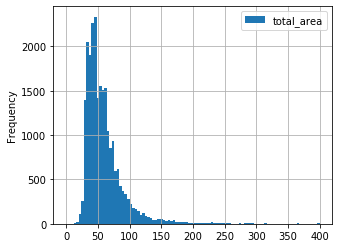

In [19]:

data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,4), range = (0,400))
data['total_area'].describe()

Распределение по гистограмме общей площади нормальное.

count        23,699.00
mean      6,541,548.77
std      10,887,013.27
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,800,000.00
max     763,000,000.00
Name: last_price, dtype: float64

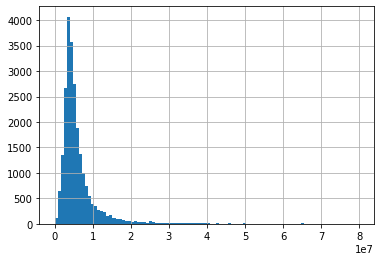

In [20]:
pd.options.display.float_format ='{:,.2f}'.format

data['last_price'].hist(bins = 100, grid=True, range = (0, 80000000))
data['last_price'].describe()


Распределение по гистограмме цене также нормальное.

count   23,699.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

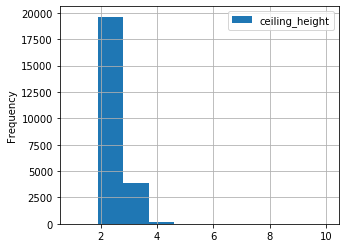

In [21]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 10, range = (1,10), grid=True, figsize = (5,4))
data['ceiling_height'].describe()

Распределение по гистограмме высоты потолков нормальное.

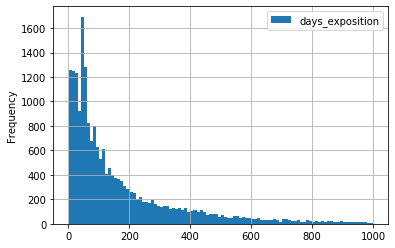

In [22]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1, 1000))

На гистограмме по количеству дней размещения выделяется несколько пиковых значение. Как выяснилось, это связано с автоматизацей срока давности объявлений на сервисе Яндекс.Недвижимость. То есть, удалять их из выборки не стоит

count   20,518.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

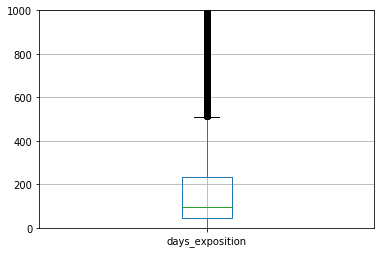

In [23]:
# Построим диаграмму размаха для количества дней размещения
import matplotlib.pyplot as plt
data['days_exposition'].plot.box(grid=True)
plt.ylim(0, 1000)
data['days_exposition'].describe()


In [24]:
data['days_exposition'].value_counts()

45.00       880
60.00       538
7.00        234
30.00       208
90.00       204
           ... 
1,110.00      1
1,049.00      1
951.00        1
693.00        1
773.00        1
Name: days_exposition, Length: 1141, dtype: int64

В среднем объявление держится около 180 дней. Мы обнаружили пиковые значение в 90, 45, 60, 30 и 7 дней. Больше 500 дней - количество объявлений крайне мало. 

По гистограмме общей площади выше видно, что общая площадь от 25 до 200, далее количество объявлений крайне мало. Отбрасываем остальные значения

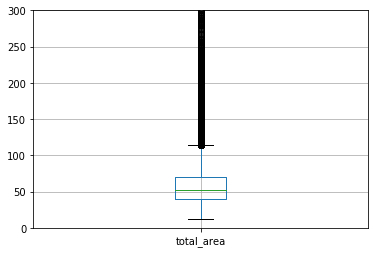

In [25]:

data['total_area'].plot.box(grid=True)
plt.ylim(0, 300)
data_good = data.query('25 < total_area < 200')

In [26]:
data['ceiling_height'].value_counts()

2.65      9871
2.50      3515
2.60      1646
2.70      1574
3.00      1112
          ... 
3.98         1
4.65         1
5.80         1
4.90         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

Отбросим данные по высоте потолков, ниже двух и выше 3,5 метров - редкие значения. Для цены выставим границы от 300000 до 40000000

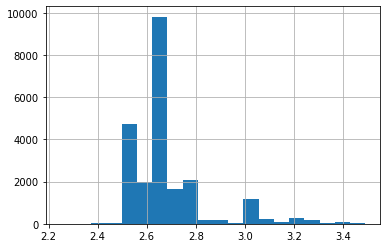

In [27]:

data_good = data_good.query('2 < ceiling_height < 3.5')
data_good['ceiling_height'].hist(bins=20)

In [28]:
data_good = data_good.query('300000 < last_price < 40000000')

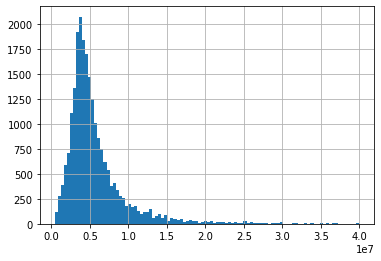

In [29]:
data_good['last_price'].hist(bins=100)

(0, 10)

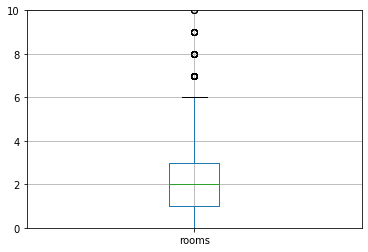

In [30]:
data['rooms'].plot.box(grid=True)
plt.ylim(0, 10)


1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

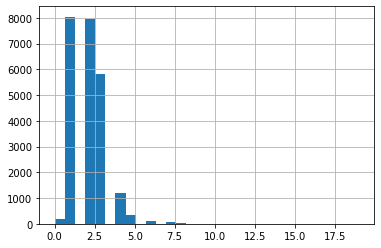

In [31]:
data['rooms'].hist(bins=30)
data['rooms'].value_counts()

Для комнат оставим только квартиры с количеством комнат меньше 8

In [32]:
data_good = data.query('rooms < 8')

После удаления посмотрим на отношение исходной таблицы и новой с "хорошими" данными

In [33]:
len(data_good) / len(data)

0.9986919279294485

                     rooms  last_price  total_area  cityCenters_nearest  floor
rooms                 1.00        0.35        0.75                -0.18  -0.15
last_price            0.35        1.00        0.64                -0.21   0.02
total_area            0.75        0.64        1.00                -0.23  -0.03
cityCenters_nearest  -0.18       -0.21       -0.23                 1.00   0.01
floor                -0.15        0.02       -0.03                 0.01   1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f162b4096d0>,
      dtype=object)

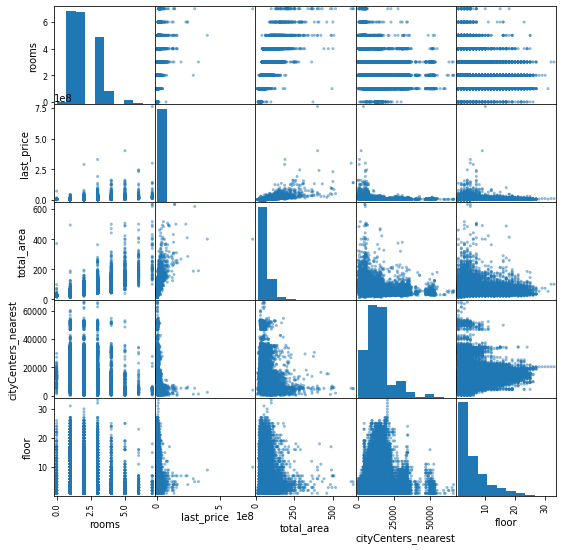

In [34]:
# 
mprice_corr = data_good.loc[:, ['rooms', 'last_price', 'total_area', 'cityCenters_nearest', 'floor']]
print(mprice_corr.corr())
pd.plotting.scatter_matrix(mprice_corr, figsize=(9, 9))

Рассматривая коэффициент корреляции, можно увидеть, что цена зависит от общей площади. Этаж, удаленность от центра и количество комнат имеет с ценой слабую зависимость.

                 m_price
floor_category          
другой         98,302.54
первый         81,218.89
последний      87,782.02


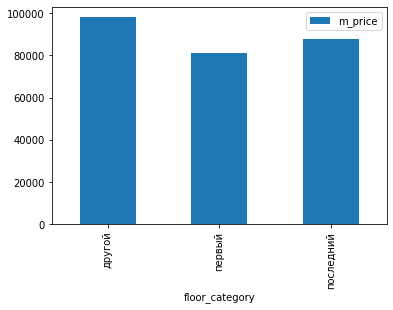

In [35]:
pivot_floor_category = data_good.pivot_table(index='floor_category', values='m_price', aggfunc='median')
pivot_floor_category.plot(y='m_price', kind ='bar')
print(pivot_floor_category)

Цена за квадратный метр на первом этаже ниже, чем на последнем или других. Самая высокая цена наблюдается на этажах категории "другой".

            m_price
first_day          
0         94,703.96
1         95,588.24
2         95,454.55
3         95,132.92
4         94,616.16
5         93,548.39
6         94,494.96


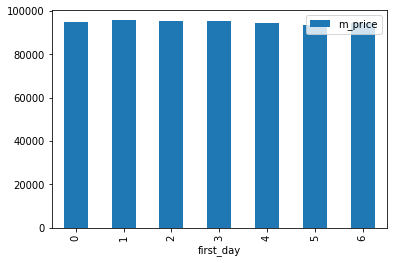

In [36]:
pivot_first_day = data_good.pivot_table(index='first_day', values='m_price', aggfunc='median')
pivot_first_day.plot(y='m_price', kind ='bar')
print(pivot_first_day)

Самая высокая цена в понедельник, к пятнице цена за квадратный метр снижается.

              m_price
first_month          
1           95,209.58
2           95,000.00
3           95,233.27
4           96,608.53
5           92,857.14
6           92,799.54
7           95,000.00
8           96,026.32
9           95,592.14
10          94,196.04
11          95,588.24
12          94,254.17


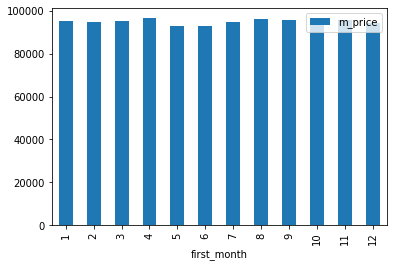

In [37]:
pivot_first_month = data_good.pivot_table(index='first_month', values='m_price', aggfunc='median')
pivot_first_month.plot(y='m_price', kind ='bar')
print(pivot_first_month)

Летом цены падают, причина кроется в падении спроса. Причины падения спроса стоит изучать отдельно,, они могут разнообразны: отпуска, многие уезжают летом работать вахтовым методом, чтобы осенью совершить крупные покупки итп. Самые выоские цены в апреле и августе. В апреле, сезон - весна, думаю, покупки могут быть связаны с психологией человека, а также с накоплениями за год. 

              m_price
first_year           
2014       107,000.00
2015        93,414.63
2016        91,743.12
2017        92,558.56
2018        95,691.72
2019       103,305.79


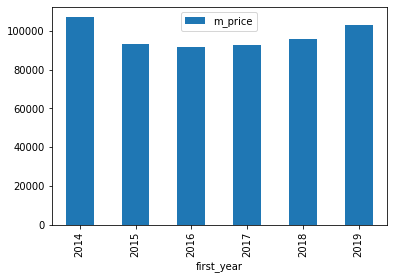

In [38]:
pivot_first_year = data_good.pivot_table(index='first_year', values='m_price', aggfunc='median')
pivot_first_year.plot(y='m_price', kind ='bar')
print(pivot_first_year)

Резкое падение цены в 2015 году. Скорее всего, связано с событиями на политической арене мира 2014 года, обвалом рубля в конце 2014 года, украинским кризисом, протестами в Гонконге, санкциями. В 2016 году цена еще немного снизилась, далее пошла на подъем. в 2019 году она приближается к значению 2014 года.

Далее по плану анализа выделим 10 населенных пунктов с наибольшим количеством объявлений и посчитаем среднюю цену 

In [39]:
pivot_locality_name = data_good.pivot_table(index='locality_name', values ='m_price', aggfunc=['count', 'mean'])
pivot_locality_name.columns = ['count', 'mean']
pivot_locality_name = pivot_locality_name.sort_values('count', ascending = False).head(10)
pivot_locality_name

,count,mean
locality_name,,
Санкт-Петербург,15691,"114,784.14"
Мурино,590,"86,087.51"
Кудрово,472,"95,324.93"
Шушары,440,"78,677.36"
Всеволожск,398,"68,654.47"
Пушкин,369,"103,125.82"
Колпино,337,"75,333.30"
Парголово,327,"90,175.91"
Гатчина,307,"68,746.15"


Подавляющее число объявлений приходится на Санкт-Петербург. Если брать во внимание расстояние до Санкт-Петербурга, то все населенные пункты, за исключением Выборга, находятся на расстоянии от 17км до 40км. Выборг стоит на последнем месте и до Санкт-Петербурга более 100км. У нас такой цели не стоит, однако если анализировать рынок пригорода Санкт-Петербурга, можно добавить сравнение по количеству жителей.
Что касается цены, самая высокая цена в Санкт-Петербурге. Далее идут Пушкин, Кудрово и Парголово. Самые дешевые квартиры в Всеволожске и Выборге.

Далее построим график зависимости цены от удалености от центра и посмотрим на поведением графика

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


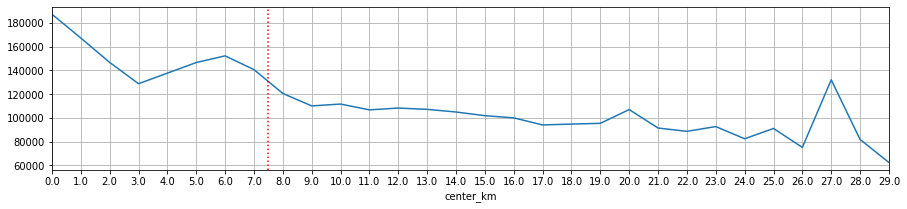

In [40]:

data_good['center_km'] = data_good['cityCenters_nearest'] // 1000
table_center = (data_good.query('locality_name == "Санкт-Петербург"').groupby('center_km')
                .agg({'m_price': 'mean'})
                .rename(columns = {'m_price': 'Средняя цена за м2'})
               )
table_center['Средняя цена за м2'].plot(grid=True, figsize = (15,3))
plt.axvline(x = 7.5, color = 'red', linestyle = ':')
plt.xticks(table_center.index.values, table_center.index.values)
plt.show()

На трех километрах график сильно меняется, выделяем эту зону как центр

In [41]:
center_spb = data_good.query('center_km <= 3 and locality_name == "Санкт-Петербург"')

                     rooms  last_price  total_area  cityCenters_nearest  floor
rooms                 1.00        0.25        0.75                -0.05   0.15
last_price            0.25        1.00        0.53                -0.10   0.23
total_area            0.75        0.53        1.00                -0.11   0.22
cityCenters_nearest  -0.05       -0.10       -0.11                 1.00   0.08
floor                 0.15        0.23        0.22                 0.08   1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f162945a890>,
      dtype=object)

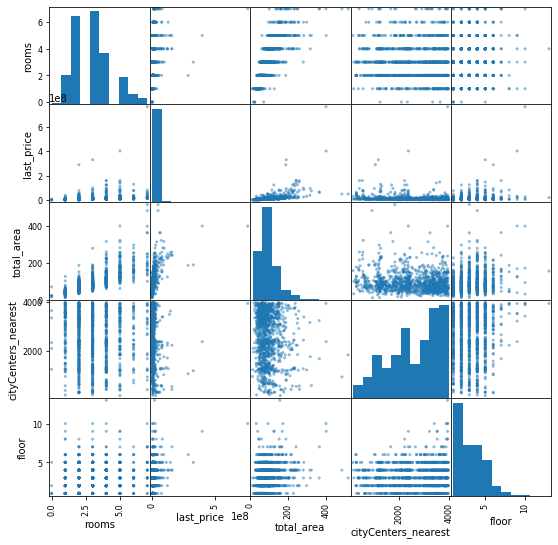

In [42]:
spb_cor = center_spb.loc[:, ['rooms', 'last_price', 'total_area', 'cityCenters_nearest', 'floor']]

print(spb_cor.corr())
pd.plotting.scatter_matrix(spb_cor, figsize=(9, 9))

Результаты коэффициента корреляции практически такие же, как при анализе всех данных. Единственное, корреляция общей площади и цены немного стала немного ниже. Корреляция стремится к нулю, то есть линейной зависимости нет.

         m_price
rooms           
0     122,701.75
1     165,104.35
2     146,599.92
3     137,133.04
4     143,547.27
5     147,110.37
6     134,176.40
7     210,345.00


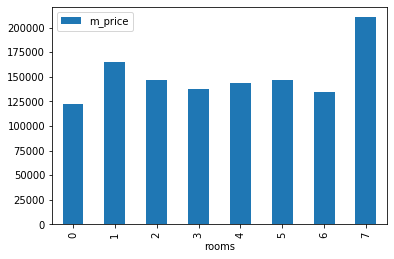

In [43]:
pivot_rooms = center_spb.pivot_table(index='rooms', values='m_price', aggfunc='mean')
pivot_rooms.plot(y='m_price', kind ='bar')
print(pivot_rooms)

Самая высокая цена за квадратный метр в однокомнатных и семикомнатных квартирах, дешевле всего квадратный метр стоит в студиях.

                  m_price
floor_category           
другой         119,148.94
первый         106,927.57
последний      114,680.52


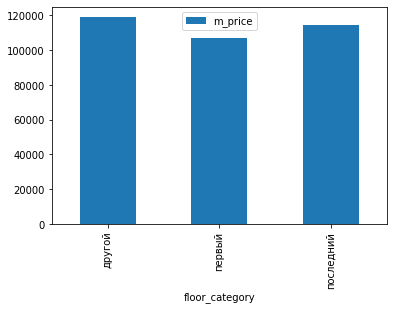

In [44]:
pivot_floor = center_spb.pivot_table(index='floor_category', values='m_price', aggfunc='median')
pivot_floor.plot(y='m_price', kind ='bar')
print(pivot_floor)

Дешевле всего в центре квартиры на первом этаже. Дороже всего на этажах в категории "другой".

-0.16894316190660827

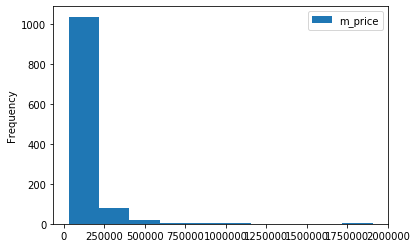

In [45]:
center_spb.plot(kind = 'hist', y = 'm_price', x = 'cityCenters_nearest')

center_spb['cityCenters_nearest'].corr(center_spb['m_price'])

Коэффициент корреляции ничтожно мал, зависимости цены от удаленности в центре нет.

              m_price
first_year           
2014       260,000.00
2015       107,055.59
2016       108,762.32
2017       114,503.82
2018       117,948.72
2019       131,290.15


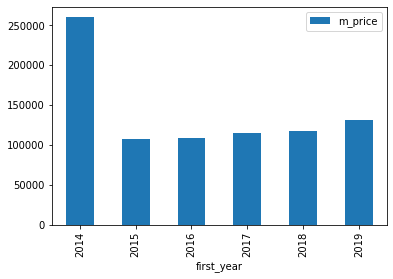

In [46]:
pivot_first_year1 = center_spb.pivot_table(index='first_year', values='m_price', aggfunc='median')
pivot_first_year1.plot(y='m_price', kind ='bar')
print(pivot_first_year1)

               m_price
first_month           
1           115,330.61
2           116,406.25
3           117,409.57
4           126,484.91
5           107,799.22
6           111,469.12
7           112,754.79
8           110,491.57
9           116,054.16
10          121,978.41
11          112,603.95
12          121,579.77


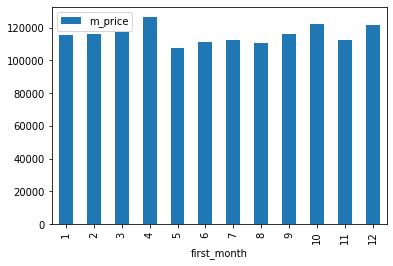

In [47]:
pivot_first_m1 = center_spb.pivot_table(index='first_month', values='m_price', aggfunc='median')
pivot_first_m1.plot(y='m_price', kind ='bar')
print(pivot_first_m1)

Цена в 2014 году самая высокая, в 2015 резкий обвал более чем в два раза, далее медленный подьем. Сейчас цена в два раза меньше, чем в 2014 году. Самая низкая цена наблюдается в мае, июне и сентябре. Самая высокая в декабре и апреле.


             m_price
first_day           
0         121,354.33
1         114,000.00
2         114,196.82
3         110,132.16
4         117,984.38
5         121,136.17
6         113,960.28


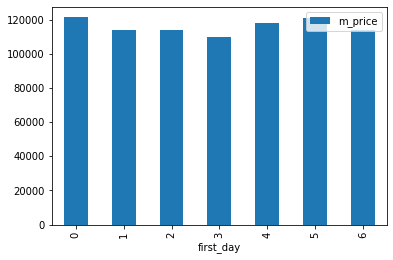

In [48]:
pivot_first_d1 = center_spb.pivot_table(index='first_day', values='m_price', aggfunc='median')
pivot_first_d1.plot(y='m_price', kind ='bar')
print(pivot_first_d1)

Дешевле всего квартиры в среду и субботу. Дороже всего квадратный метр в пятницу и воскресенье.

На этом шаге мы построили гисограммы для площади, цены, числа комнат и высоте потолков в квартирах. По итоге мы определи редкие значение и обрезали их. Изучили количество дней публикации объявления, обнаружили пиковые значение, а также среднее количество дней, за которе продается квартира. 
Построили матрицу и посмотрели на корреляци таких параметров, как площадь, цена, удаленность от центра, число комнат и высота потолков. После определения центральной области и построения графика зависимости цены от удаленности, проделали тоже самое с данными по центру.  
Провели анализ и построили графики цены по дням недели, месяцам и годам. 
Определили 10 городов с самым большим количеством объявлений и сравнили средние цены на квартиры в них. 



## Общий вывод

Мы изучили поставленные задачи и приступили к обработке данных. Были изучены пропуски и заменены на подходящие значения. Мы добавили в таблицу цену квадратного метра, выделили в отдельные колонки день недели, месяц и год публикации объявления, рассортировали этажи на три категории: первый, последний и другой, отношение площади кухни к общей, а также отношение жилой и общей площади. Построили гистограммы и определили редкие значения.

По итогам проведенного анализа можно сделать следующие выводы: 

1. В среднем публикация длится 180 дней, то есть квартира продается в среднем за 180 дней.
2. Больше всего квартир продается в Санкт-Петербурге и ближайших к нему населенных пунктах.
3. Самая высокая цена на квартиры в Санкт-Петербурге.
2. Коэффицент корреляции показал зависимость цены от общей площади, при этом корряции между этажом, количеством комнат с ценой не наблюдается. Данные по общей выгрузке и центру практически идентичны. Однако в центре зависимость цены от общей площади ниже, чем в по всем данным. 
3. Центральной областью мы обозначили радиус 3 километра, судя по данным графика зависимости цены за квадратный метр от удаленности от центра.
4. В 2015 году цены на жилье резко упали, сравнивая центр и общие данные, цена в центре упала сильнее и темпы ее восстановления ниже. 
5. В центре квартиры дешевле всего в мае, июне и сентябре. Доороже всего обойдется квартира в апреле и декабре. Этот результат отличается и рынка в общих данных, там дороже всего квартира будет в августе или апреле.
  


